# Session 1: Coding Solution

```{contents}

```

## Problem 1: Face Recognition with PCA and KNN (7 popints)

In this problem, we will use PCA to extract features and then use KNN model to give predictions based on extracted features.

### Prepare the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import sklearn.datasets as datasets
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.8)

### Analyze the data

In [ ]:
print(dataset.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


Some important `key` you need to consider when solving this problem:
- `images`: the grayscale image dataset (already normalized)
- `data`: the grayscale image dataset already normalized). Each image is flattened into one vector
- `target`: label of each image/face (type `int`)
- `target_names`: name of each face (type `str`)

In [ ]:
data = dataset.data
target = dataset.target
target_names = dataset.target_names
num_image, h, w = dataset["images"].shape

print("Number of images:", num_image)
print("Height of each image:", h)
print("Width of each image:", w)
print("Data shape:", data.shape)

Number of images: 1288
Height of each image: 100
Width of each image: 75
Data shape: (1288, 7500)


Let's see the names of faces included in the dataset

In [ ]:
print("Number of people in the dataset:", len(target_names))
print(target_names)

Number of people in the dataset: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


The variable `target` contains the labels of the above 7 faces, numbered from 0 to 6

In [ ]:
print(target)
print("-" * 30)
ids, counts = np.unique(target, return_counts=True)
for id, count in zip(ids, counts):
  print(f"There are {count} images of {target_names[id]}")

[5 6 3 ... 5 3 5]
------------------------------
There are 77 images of Ariel Sharon
There are 236 images of Colin Powell
There are 121 images of Donald Rumsfeld
There are 530 images of George W Bush
There are 109 images of Gerhard Schroeder
There are 71 images of Hugo Chavez
There are 144 images of Tony Blair


Visualization

In [ ]:
target_with_name = [target_names[id] for id in target]
fig = px.histogram(x=target_with_name, color=target_with_name)
fig.show()

Visualize 5 random images of 5 person

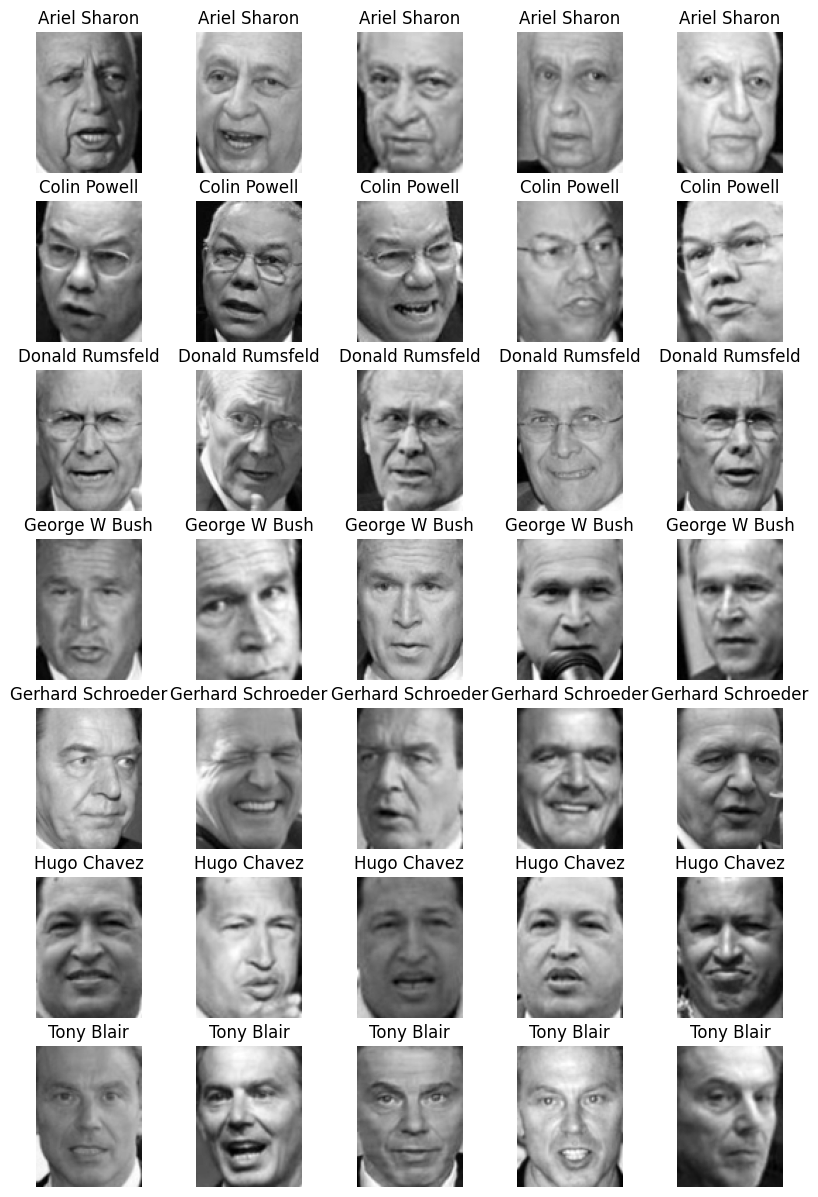

In [ ]:
n_people = 7
n_image = 5

fig, axes = plt.subplots(n_people, n_image, figsize=(10,15))
for row in range(n_people):
  current_id_indices = np.where(target == row)[0]
  random_indices = np.random.choice(current_id_indices, size=n_image, replace=False)

  for col in range(n_image):
    current_ax = axes[row][col]
    current_ax.grid('off')
    current_ax.axis('off')

    image_index = random_indices[col]
    current_ax.imshow(data[image_index].reshape(h,w), cmap='gray')
    current_ax.set_title(target_names[row])

plt.show()

### Use PCA to reduce data dimension and draw Embedding Space

#### TODO 1

Use PCA to reduce the dimension of the data set to 3 dimensions, then print out the amount of information retained.

- `pca.explained_variance_ratio_` is the percentage of variance explained by each of the principal components. It tells you how much information (variance) can be attributed to each of the components. The sum of all the ratios is equal to 1.0.

- For example, if you have two components, and the output is `[0.8, 0.2]`, it means that the first component explains 80% of the variance in the data, and the second component explains 20% of the variance.

- The `pca.explained_variance_ratio_` is calculated by dividing the `pca.explained_variance_` by the sum of all the variances. The `pca.explained_variance_` is the eigenvalue of each component, which measures how much of the variance of the data is along that component.

In [ ]:
# YOUR SOLUTION
from sklearn.decomposition import PCA
pca = PCA(3).fit(data)
print("The amount of retained information:", pca.explained_variance_ratio_)

The amount of retained information: [0.20046061 0.13598016 0.06750589]


We see from the above results
- 1st component explains 20.05% of the variance in the data
- 2nd component explains 13.60% of the variance in the data
- 3rd component explains 6.75% of the variance in the data

Sum is 40.4% which means there are 59.6% of the variance that is not captured by these three components $→$, we need to increase the components to get a better representation of the data.

But when we need to plot the representation, we should only use 3 components to plot on 3D graph.

In [ ]:
print('Number of Principal Components:', pca.n_components_)
print("Shape of Principal Components:", pca.components_.shape)

Number of Principal Components: 3
Shape of Principal Components: (3, 7500)


In [ ]:
# transform the the data
embed_3d = pca.transform(data)

#### TODO 2

Dùng `plotly.express` để vẽ đồ thị `scatter_3d` trên bộ dữ liệu 3 chiều, tô màu các chấm tròn theo tên người (dùng biến `target_with_name` có sẵn ở trên)

In [ ]:
# YOUR SOLUTION
import pandas as pd
df = pd.DataFrame({
    "principal_component_1": embed_3d[:,0],
    "principal_component_2": embed_3d[:,1],
    "principal_component_3": embed_3d[:,2]
})

fig = px.scatter_3d(
    df,
    x="principal_component_1",
    y="principal_component_2",
    z="principal_component_3",
    color=target_with_name
)
fig.show()

We see that the Embedding Space of the 3 main components is not very good, the data points are mixed together, so it will be difficult to classify properly.

In fact, Face Recognition applications do not use PCA to extract features. Instead, they will use the Pretrained Model (which has been trained on a large amount of face data) to create Embedded Vector for faces. These pretrained embedded vectors are so good that if we reduce the data dimension to 3 and draw on the graph, we still see that the faces are separated very well.

### Train Test Split

#### TODO 3

Use the **Stratified Split** technique to split the dataset into 2 sets: Train và Test
- The train set accounts for 80%
- Shuffle
- Use random seed 42 to maintain the similar result


In [ ]:
# YOUR SOLUTION
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=42)

print('Shape of x train:', x_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of x test:', x_test.shape)
print('Shape of y test:', y_test.shape)

Shape of x train: (1030, 7500)
Shape of y train: (1030,)
Shape of x test: (258, 7500)
Shape of y test: (258,)


### Feature Extraction with PCA

#### TODO 4

Hãy dùng PCA để trích xuất đặc trưng trên Train Set và Test Set sao cho phần trăm thông tin được giữ lại là 99%.

Name the 2 new variables as `x_train_pca` và `x_test_pca`

In [ ]:
# YOUR SOLUTION
pca = PCA(0.99) # 99% information retained
pca.fit(x_train) # fit on train set

# transform on train and test set
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("Number of Principal Components used:", pca.n_components_)
print("New train shape:", x_train.shape)
print("New test shape:", x_test.shape)

Number of Principal Components used: 486
New train shape: (1030, 7500)
New test shape: (258, 7500)


Compare the original face with the approximate face (reconstructed with PCA).

Instead of using math formulas, we use `pca.inverse_transform`

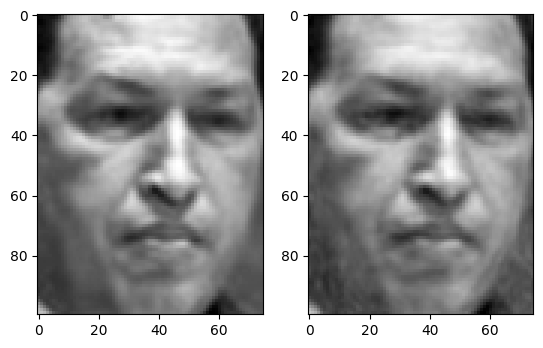

In [ ]:
index = np.random.choice(x_train.shape[0])

sample = x_train[index]
sample_pca = x_train_pca[index]

fig = plt.subplot(1,2,1)
fig.imshow(sample.reshape(h, w), cmap="gray")
fig = plt.subplot(1,2,2)
fig.imshow(pca.inverse_transform(sample_pca).reshape(h, w), cmap="gray")
plt.show()

### Classification with KNN

#### TODO 5

- Train K-NN models to classify faces on extracted datasets after applying PCA
  - Experiment with different `k` to find the best model.
  - Call function ``score`` to view Accuracy on Train Set and Test Set
  ```
  print('Accuracy on Train Set',model.score(x_train_pca, y_train))
  print('Accuracy on Test Set',model.score(x_test_pca, y_test))
  ```

In [ ]:
# YOUR SOLUTION
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 13)
model.fit(x_train_pca, y_train)
print(f'Accuracy on Train Set: {round(model.score(x_train_pca, y_train)*100,2)} %')
print(f'Accuracy Test Set: {round(model.score(x_test_pca, y_test)*100,2)} %')

Accuracy on Train Set: 53.88 %
Accuracy Test Set: 30.23 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define a function to experiment with various k parameters by looping
def train_knn_model(k, x_train, y_train, x_test, y_test):
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(x_train, y_train)
  train_accuracy = knn_model.score(x_train, y_train)
  test_accuracy = knn_model.score(x_test, y_test)
  print(f"K={k} --- Train Accuracy: {train_accuracy} --- Test Accuracy: {test_accuracy}")
  print("-"*25)
  return knn_model, test_accuracy

best_test_accuracy = 0
best_model = None

for k in range(2, 70, 3):
  current_model, current_test_accuracy = train_knn_model(k, x_train_pca, y_train, x_test_pca, y_test)
  # Check the test accuracy, if better -> update
  if current_test_accuracy > best_test_accuracy:
    print("-"*30)
    print(f"Update to best model with k = {k}")
    print(f"Test Accuracy of best model: {current_test_accuracy}")
    print("-"*30)
    best_model = current_model
    best_test_accuracy = current_test_accuracy

K=2 --- Train Accuracy: 0.7854368932038835 --- Test Accuracy: 0.5116279069767442
-------------------------
------------------------------
Update to best model with k = 2
Test Accuracy of best model: 0.5116279069767442
------------------------------
K=5 --- Train Accuracy: 0.7271844660194174 --- Test Accuracy: 0.562015503875969
-------------------------
------------------------------
Update to best model with k = 5
Test Accuracy of best model: 0.562015503875969
------------------------------
K=8 --- Train Accuracy: 0.6737864077669903 --- Test Accuracy: 0.5658914728682171
-------------------------
------------------------------
Update to best model with k = 8
Test Accuracy of best model: 0.5658914728682171
------------------------------
K=11 --- Train Accuracy: 0.6514563106796116 --- Test Accuracy: 0.5852713178294574
-------------------------
------------------------------
Update to best model with k = 11
Test Accuracy of best model: 0.5852713178294574
------------------------------
K=14

#### TODO 6

Use the `classification_report` metrics to print out the accuracy of the model for each person in the Test set

In [ ]:
y_pred = best_model.predict(x_test_pca)

In [ ]:
# YOUR SOLUTION
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.20      0.06      0.10        16
     Colin Powell       0.51      0.72      0.60        47
  Donald Rumsfeld       0.89      0.33      0.48        24
    George W Bush       0.62      0.91      0.73       106
Gerhard Schroeder       0.57      0.18      0.28        22
      Hugo Chavez       0.00      0.00      0.00        14
       Tony Blair       0.57      0.28      0.37        29

         accuracy                           0.59       258
        macro avg       0.48      0.35      0.37       258
     weighted avg       0.55      0.59      0.53       258



#### TODO 7

- Try graphing faces to compare the predicted results of the KNN model with the actual label (random 5 photos per person, for example). Suggested steps:
  - Random out 5 photos in the Test episode belonging to each person (0 - 6)
  - Use trained models to predict names
  - Draw shapes, display the correct people's names and people's names predicted by the model

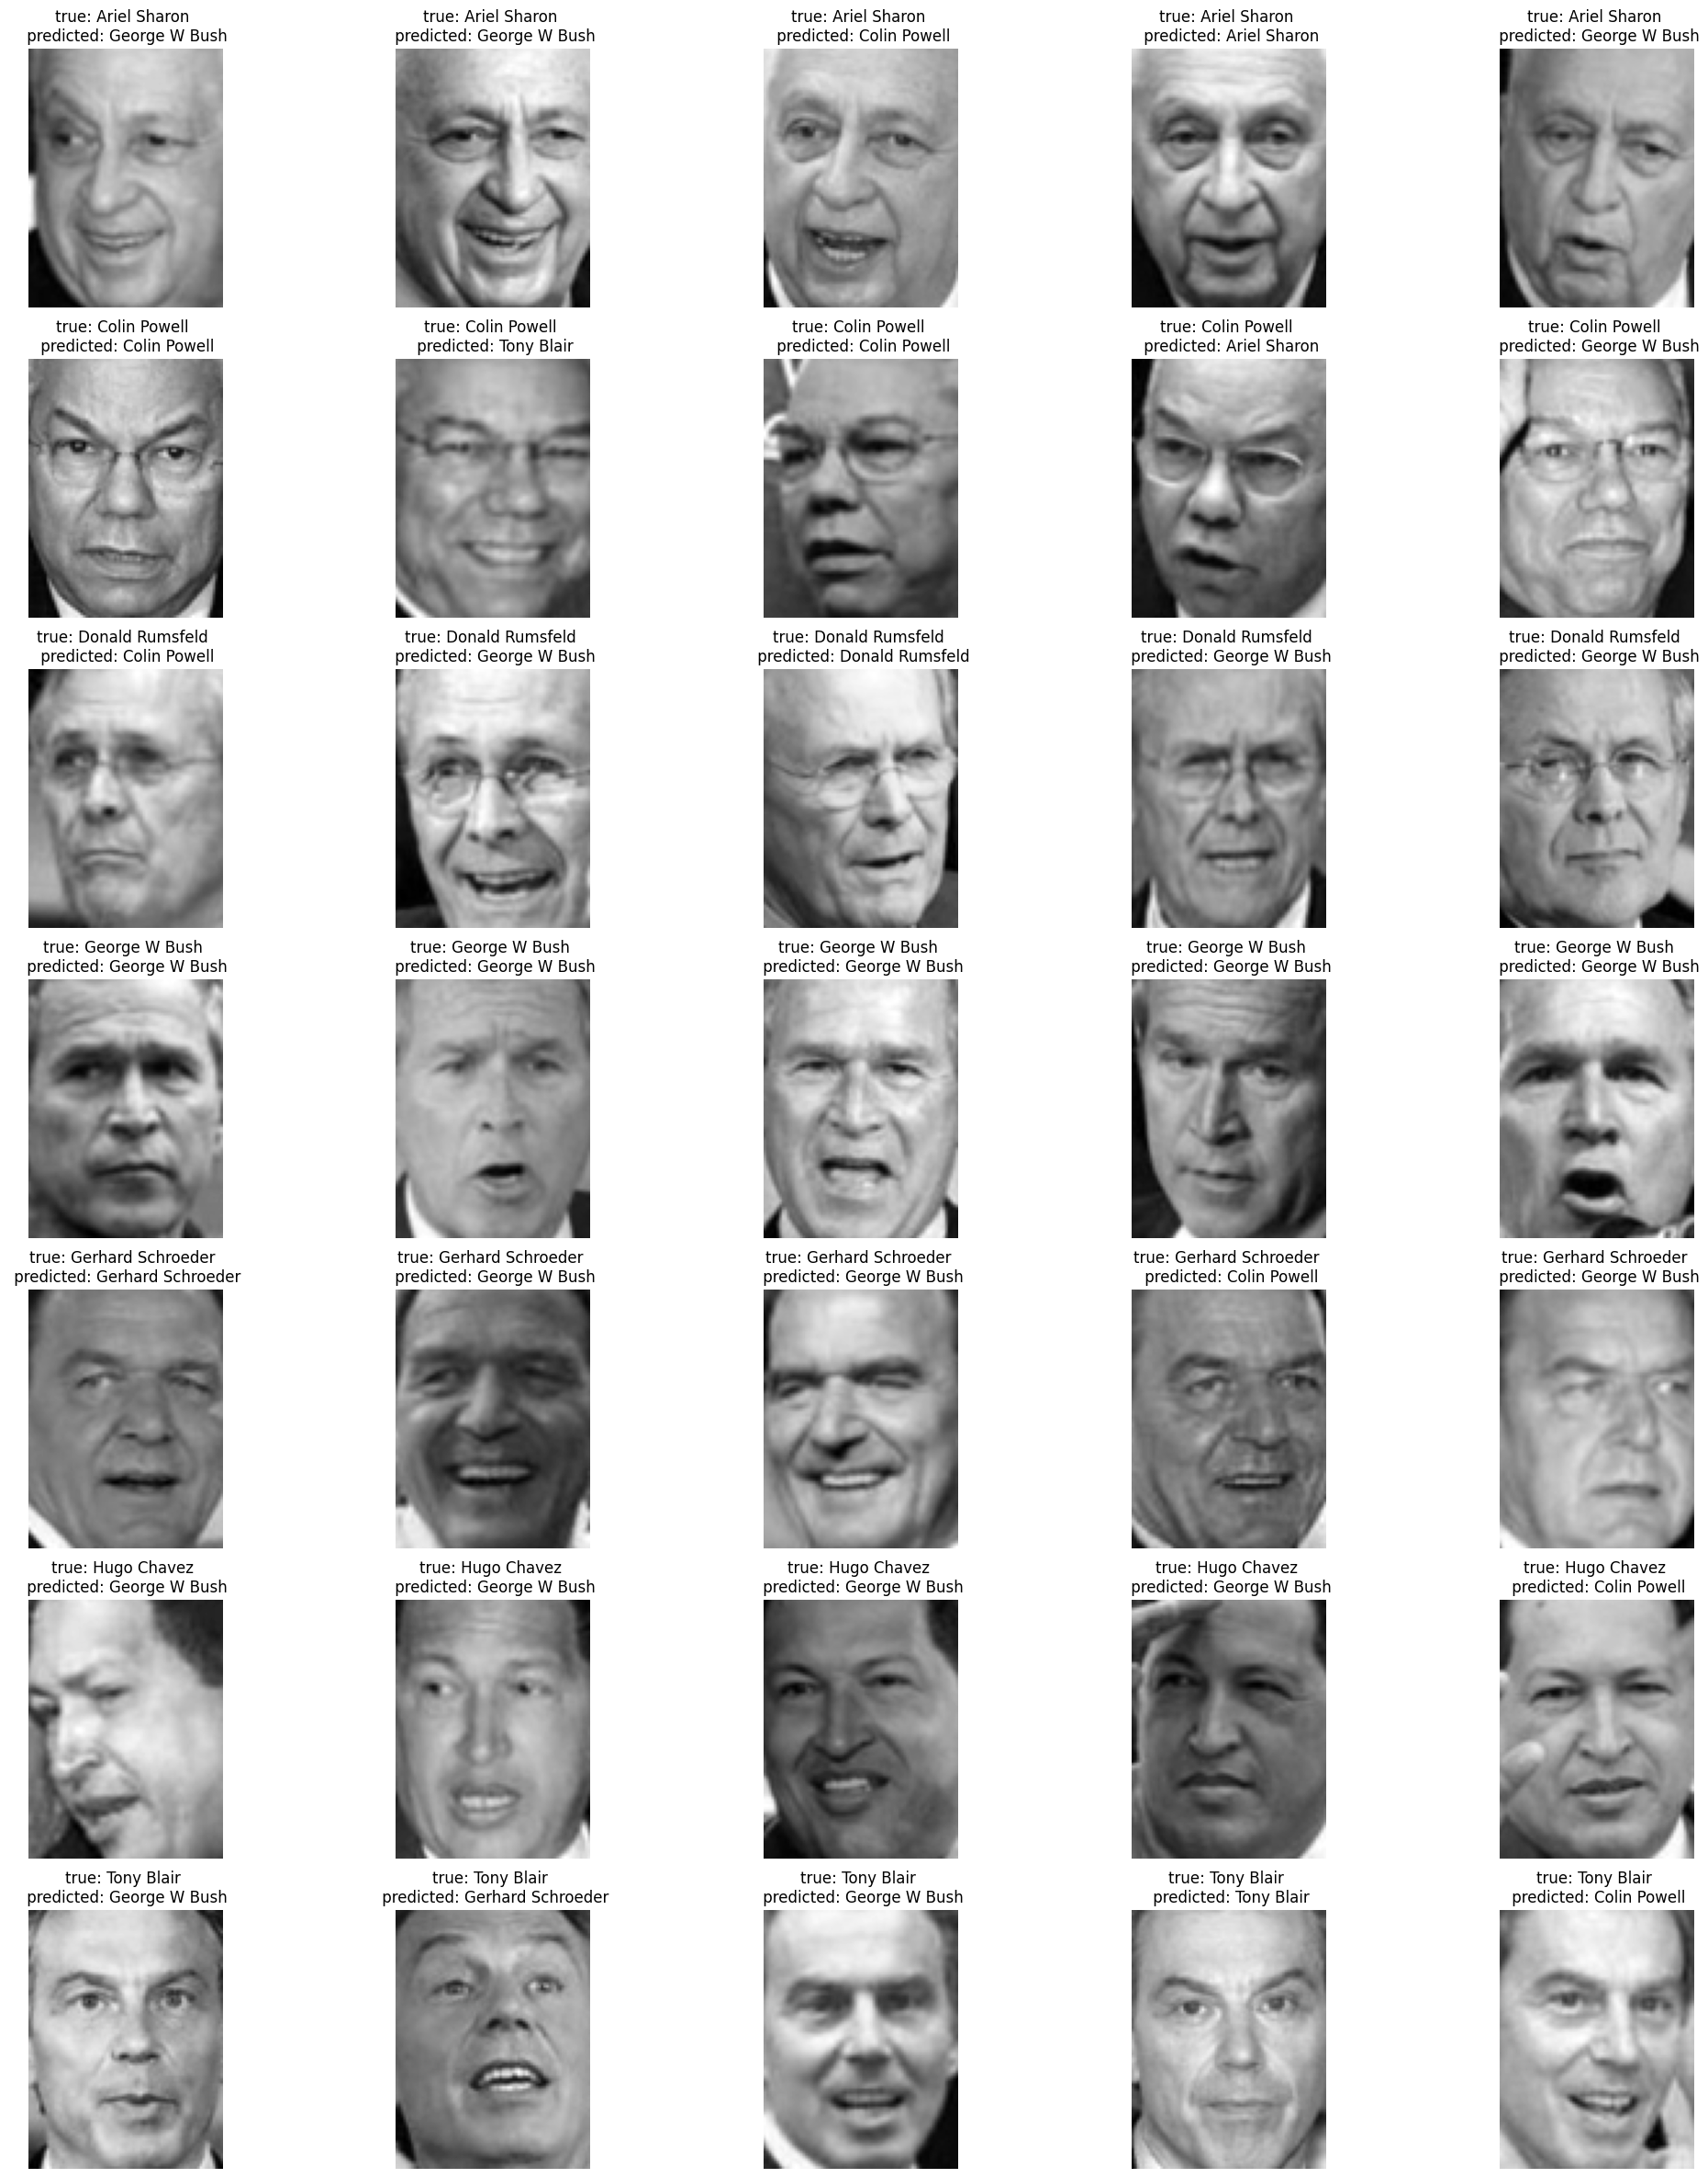

In [ ]:
num_people = 7
num_images = 5
fig, axes = plt.subplots(num_people, num_images, figsize=(25,30))

for person in range(num_people):
   indexes = np.where(y_test == person)[0]
   random_5_images = np.random.choice(indexes, size=num_images, replace=False)

   for image in range(num_images):
      axes[person][image].axis("off")
      axes[person][image].grid("off")

      image_index = random_5_images[image]
      axes[person][image].imshow(x_test[image_index].reshape(h,w), cmap='gray')

      person_pred = best_model.predict(x_test_pca[image_index].reshape(1,486))[0]
      axes[person][image].set_title(f"true: {target_names[person]} \n predicted: {target_names[person_pred]}")

## Problem 2: Console game Semantris (3 points)

In this article, we will make 1 simple game running on the Python console window. This game simulates Google's Sementris game, please try it at [here](https://research.google.com/semantris/) (choose Play Arcade)

## Guildance

Given the pre-trained AI model below

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

This model is capable of converting English words into vectors

In [ ]:
result = model(["cat", "dog", "chihuahua"]).numpy()
print(type(result))
print(result.shape)

<class 'numpy.ndarray'>
(3, 512)


Bạn hãy thiết kế 1 game dựa theo [This diagram](https://drive.google.com/file/d/1WQdZGszYniiBzoDpdx-VWEIyNz2rFvip/view?usp=sharing)

Lưu ý
- File `words.txt` Download [here](https://drive.google.com/file/d/1KYMBK_j3g7_ROEJ46Nb0PmUerY5Xdyx_/view?usp=sharing)
- you need to `strip` and `lowercase` value `y`
- values of `y` should not be duplicated with `x`
- Users only have 3 lives for the entire game.

In [ ]:
with open('Problem_2_words.txt', 'r') as f:
    words = [line.strip() for line in f]

print(f"Number of words in file txt: {len(words)}")

Number of words in file txt: 476


In [ ]:
%%time
def consine_similarity(a,b):
  pab = sum(a[i] * b[i] for i in range (len(a)))
  norm_A = sum(a[i] * a[i] for i in range (len(a))) ** 0.5
  norm_B = sum(b[i] * b[i] for i in range (len(b))) ** 0.5
  return pab / (norm_A * norm_B)

list_similarity = {}
def find_4_most_similar_word():
  for word, embedding in zip(A, embeddings):
    list_similarity[word] = consine_similarity(embedding_y, embedding)

def score_or_not(list_similarity):
  list_similarity = sorted(list_similarity.items(), key=lambda x: x[1], reverse=True)
  for i in range(4):
    if x == list_similarity[i][0]:
      return True
  return False


# main function
score = 0
blood = 3
while(score < 10 and blood != 0):
  # display
  print(f"Your score is: {score}")
  print(f"Your blood is: {blood}")

  # start game
  num_words = 10
  A = np.random.choice(words, num_words, replace=False)
  x = np.random.choice(A, 1, replace=False)[0]

  embeddings = model(A).numpy()
  y = input(f"Enter one word which is semantically similar with {x}: ")
  embedding_y = model([y]).numpy()[0]

  find_4_most_similar_word()
  if (score_or_not(list_similarity)):
    score += 1
    if (score == 10):
      print("You won")
      break
  else:
    blood -= 1
    if (blood == 0):
      print("Game over")
      break

Your score is: 0
Your blood is: 3
Enter one word which is semantically similar with ice cream: creamy
Your score is: 1
Your blood is: 3
Enter one word which is semantically similar with computer: technology
Your score is: 2
Your blood is: 3
Enter one word which is semantically similar with night: moon
Your score is: 3
Your blood is: 3
Enter one word which is semantically similar with helmet: bike
Your score is: 3
Your blood is: 2
Enter one word which is semantically similar with boat: ship
Your score is: 4
Your blood is: 2
Enter one word which is semantically similar with cop: police
Your score is: 5
Your blood is: 2
Enter one word which is semantically similar with pond: water
Your score is: 5
Your blood is: 1
Enter one word which is semantically similar with wheat: rice
Game over
CPU times: user 1.18 s, sys: 106 ms, total: 1.29 s
Wall time: 48.4 s
